In [ ]:
#Importing the data handling and graphing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#Importing the Scikit-learn libraries.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
#Create dataset
X, y = make_blobs(
   n_samples=100, n_features=2,
   centers=3, cluster_std=0.7,
   shuffle=True, random_state=0
)

In [ ]:
X

array([[ 2.45888109,  0.75185453],
       [ 0.34944349,  4.57461908],
       [ 2.7183439 ,  0.78915659],
       [-0.15345841,  4.15486913],
       [ 0.242283  ,  3.30977477],
       [ 0.73273157,  4.41323161],
       [-2.33013207,  2.61140823],
       [-0.86230945,  2.97916813],
       [ 2.52587385,  1.18288695],
       [ 0.53224461,  4.04986851],
       [ 1.48663347,  4.39407536],
       [ 1.83747356,  5.14545322],
       [ 2.38123123, -0.17770692],
       [ 2.04921553,  5.33233847],
       [-2.04823239,  2.33937528],
       [ 3.36255879,  1.53189492],
       [-1.59582078,  2.45344746],
       [ 0.40706768,  3.09538951],
       [-1.57467314,  4.11722217],
       [-2.29997235,  2.95439782],
       [-1.9774369 ,  1.36150005],
       [-1.55440199,  2.10021681],
       [-1.07881194,  1.78601303],
       [ 0.35482006,  2.9172298 ],
       [ 1.30574069,  1.63577987],
       [ 2.14410599,  1.17905621],
       [ 1.51632627,  1.27513809],
       [ 1.23966263,  1.5282422 ],
       [-1.7853313 ,

In [ ]:
y

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

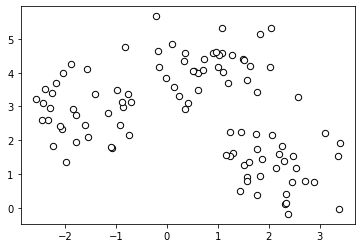

In [ ]:
# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=40
)
plt.show()

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=100, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

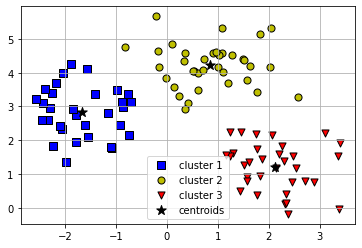

In [ ]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='b',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='y',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='r',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=100, marker='*',
    c='k', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
km.cluster_centers_

array([[-1.67300336,  2.84316255],
       [ 0.84421808,  4.22167301],
       [ 2.11410839,  1.21553434]])

In [ ]:
# Sum of Euclidean distance of samples to their closest centroids. 
km.inertia_

89.26709419351636

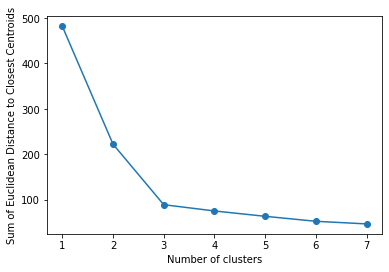

In [ ]:
# How to pick K? Compare the 'fit' i.e. sum of Euclidean distances across different number of clusters
distance = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distance.append(km.inertia_)

# plot
plt.plot(range(1, 8), distance, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Euclidean Distance to Closest Centroids')
plt.show()